# Student Performance Analysis and Prediction

## Introduction
In this analysis, we'll be working with the Students Performance dataset to understand the factors that influence student academic performance. Our ultimate goal is to build a classification model that can predict whether a student will pass or fail based on various demographic and educational features. This type of predictive modeling can help educators identify at-risk students early and provide timely interventions.

## 1. Import Libraries
We'll start by importing the necessary libraries for our analysis. These include libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (scikit-learn).

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot styling
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 2. Load and Examine the Dataset

Before diving into analysis, it's essential to understand our data. We'll load the dataset and examine its structure - checking the number of rows and columns, data types, and looking for any missing values that might need handling.

By examining the first few rows, we can get a sense of the available features and their format. This dataset contains information about students' demographics, family background, and test scores in three subjects: math, reading, and writing.

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check data types and missing values
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (1000, 8)

First 5 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Data types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## 3. Data Cleaning

Data cleaning is a crucial step in any data analysis project. Here, we check for duplicate entries that might skew our analysis and rename columns to make them easier to work with.

In this case, we're removing spaces and special characters from column names, which will make them more convenient to reference in our code. This is a simple but important preprocessing step that helps avoid potential syntax errors and improves code readability.

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Rename columns to remove spaces for easier access
df.columns = [col.replace('/', '_').replace(' ', '_') for col in df.columns]

# Verify the changes
print("New column names:")
print(df.columns)

Number of duplicate rows: 0
New column names:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the process of visually and statistically examining the dataset to understand its characteristics, identify patterns, detect anomalies, and discover relationships between variables. This step forms the foundation for our modeling decisions later.

### 4.1 Distribution of Scores

First, let's examine the distribution of math, reading, and writing scores. Understanding these distributions will give us insights into the overall performance of students and help us identify any unusual patterns or outliers.

The histograms below show the frequency distribution of scores in each subject, with a kernel density estimate (KDE) curve that approximates the probability density function of the data. This visualization helps us understand if scores follow a normal distribution or have skewness/kurtosis.

Statistical summary of scores:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


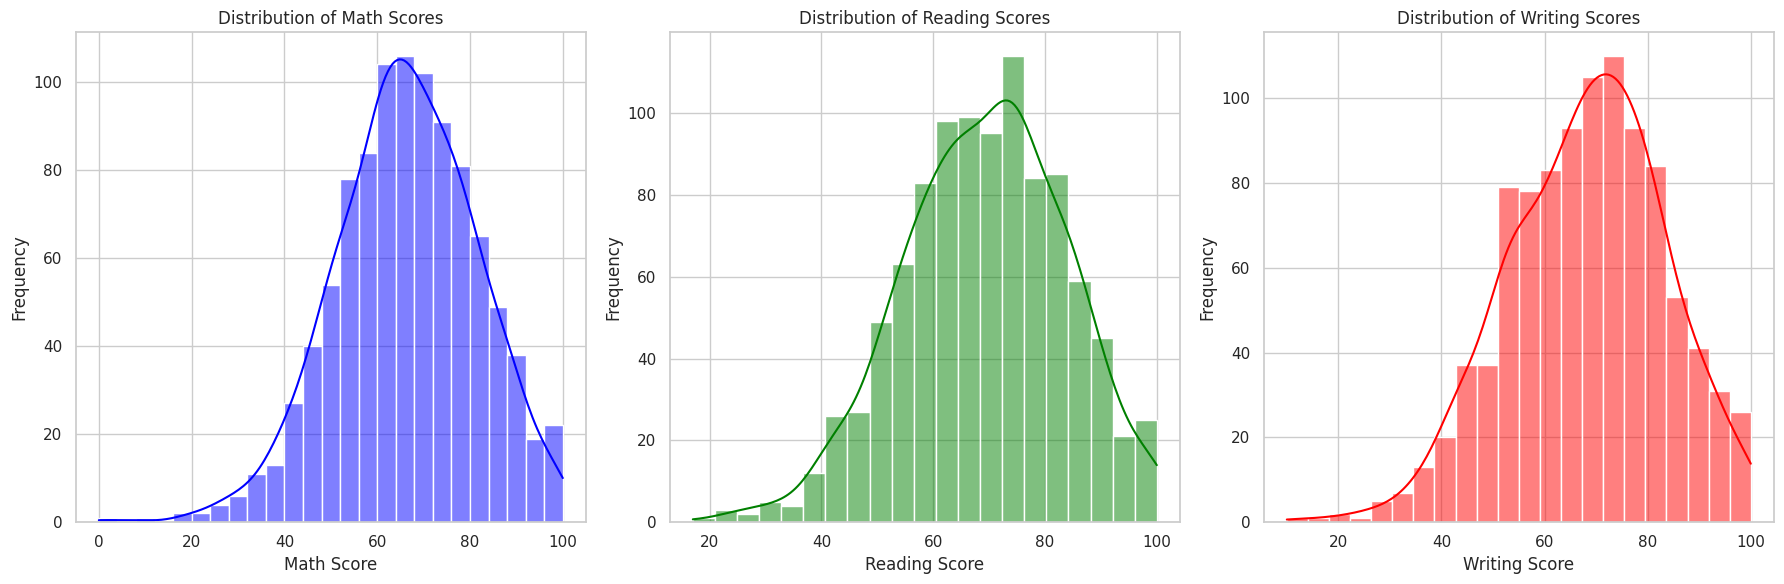

In [6]:
# Statistical summary of numerical columns
print("Statistical summary of scores:")
print(df[['math_score', 'reading_score', 'writing_score']].describe())

# Create histograms for score distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4.2 Correlation Between Scores

Correlation analysis helps us understand the relationships between different variables. In this case, we're examining how scores in different subjects relate to each other. A high correlation coefficient (close to 1) indicates a strong positive relationship, meaning students who do well in one subject tend to do well in another.

The correlation heatmap provides a visual representation of these relationships, with color intensity reflecting the strength of correlation. This analysis can help us understand if performance is consistent across subjects or if there are specific areas where students might struggle independently of their overall academic ability.

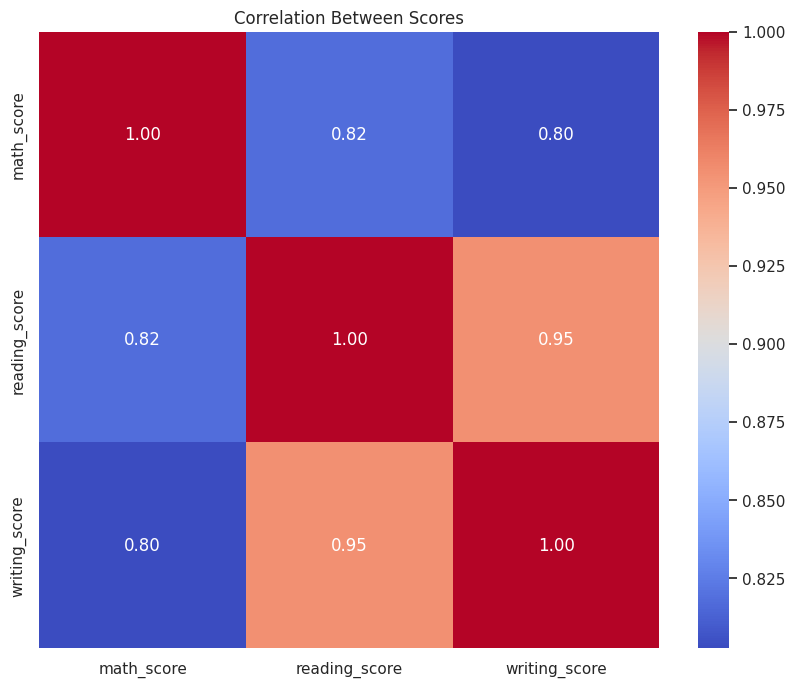

In [7]:
# Calculate correlation between numerical features
correlation = df[['math_score', 'reading_score', 'writing_score']].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Scores')
plt.show()

### 4.3 Distribution of Categorical Variables

Understanding the demographic composition of our dataset is crucial for identifying potential biases and interpreting our results correctly. This section visualizes the distribution of categorical variables like gender, race/ethnicity, parental education level, lunch type, and test preparation course completion.

For each category, we're showing both the count and percentage, giving us a clear picture of the dataset's composition. This information is important for determining if our sample is balanced or if certain groups are underrepresented, which could affect our model's performance and generalizability.

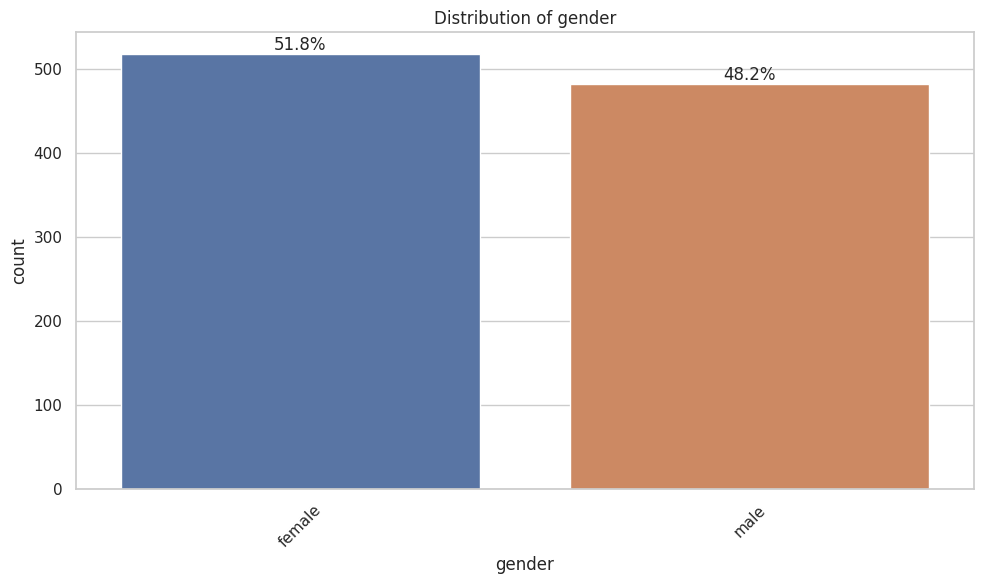

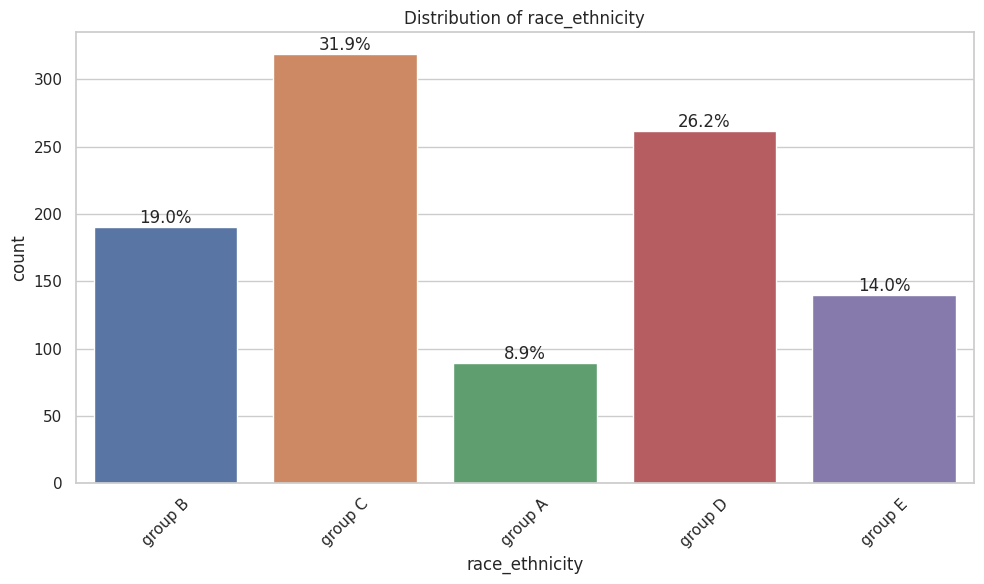

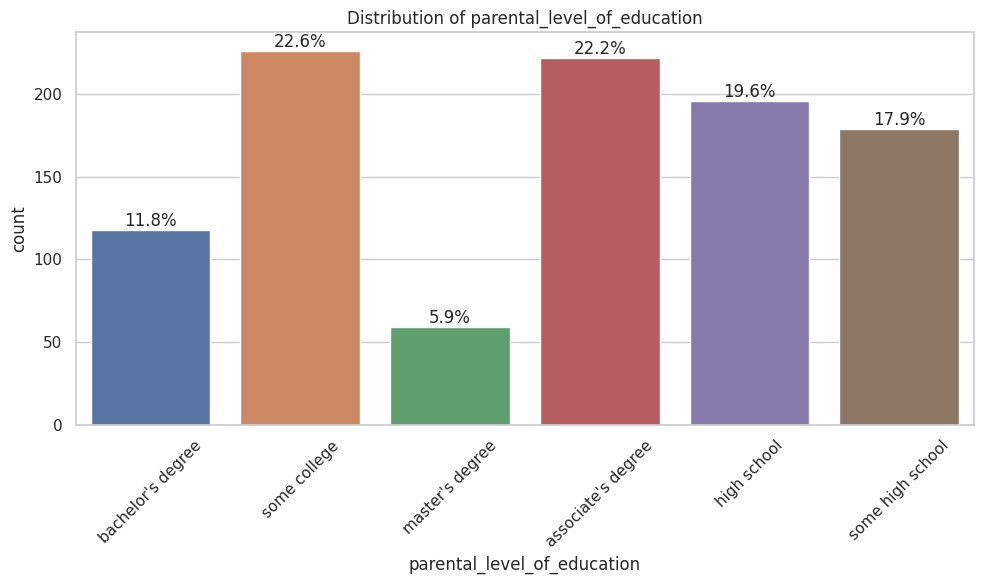

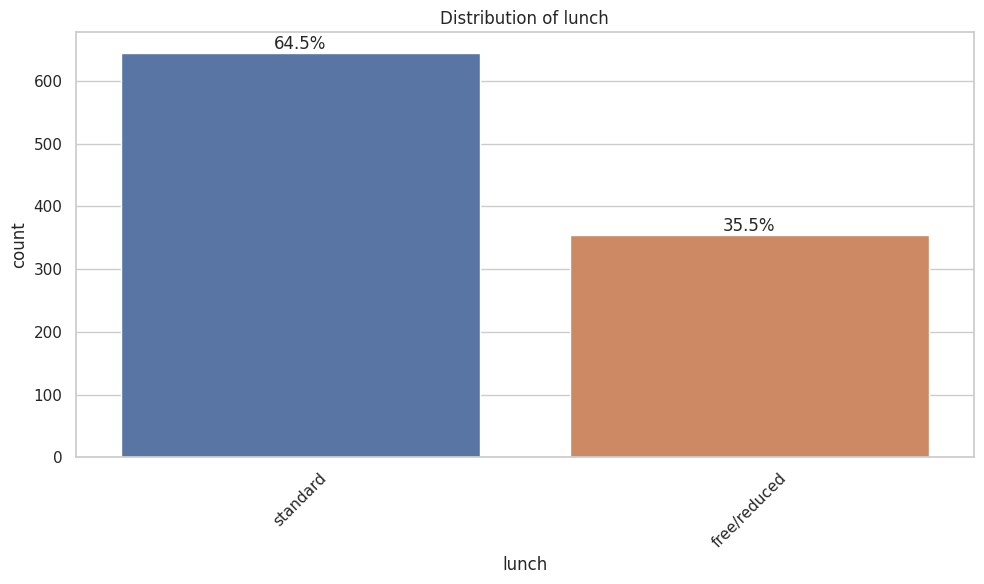

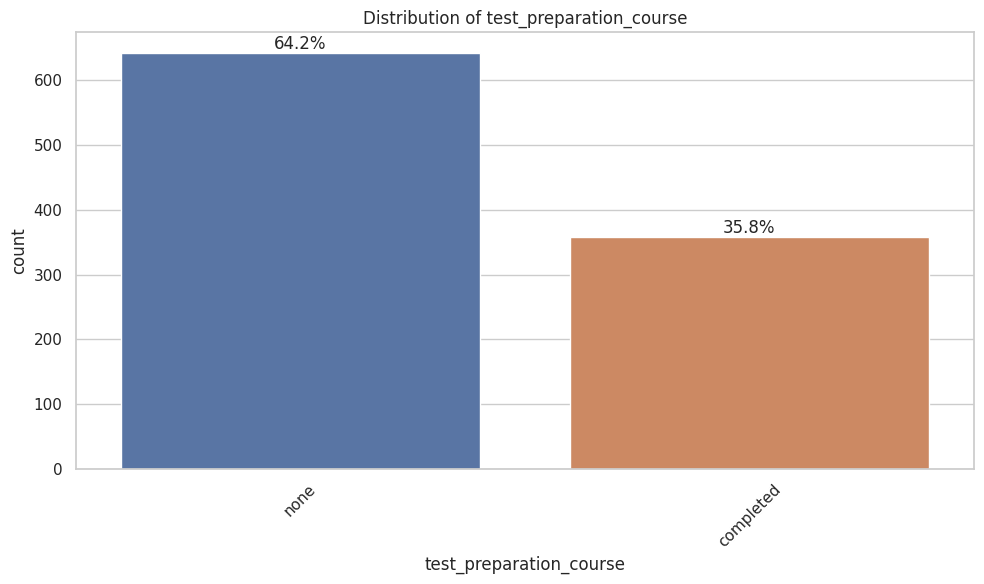

In [8]:
# Create a function to plot categorical distributions
def plot_categorical(column):
    plt.figure(figsize=(10, 6))
    count_plot = sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add percentage labels
    total = len(df)
    for p in count_plot.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        count_plot.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for each categorical variable
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 
                      'lunch', 'test_preparation_course']

for column in categorical_columns:
    plot_categorical(column)

### 4.4 Analysis of Scores by Categorical Variables

This analysis explores how test scores vary across different demographic and educational groups. Box plots provide a rich visualization that shows the median, quartiles, and potential outliers for each group, allowing us to compare distributions effectively.

By examining these differences, we can identify achievement gaps and factors that might be associated with higher or lower performance. For example, we can see if there are gender differences in specific subjects or if completing the test preparation course has a significant impact on scores. These insights can guide educational interventions and policy decisions.

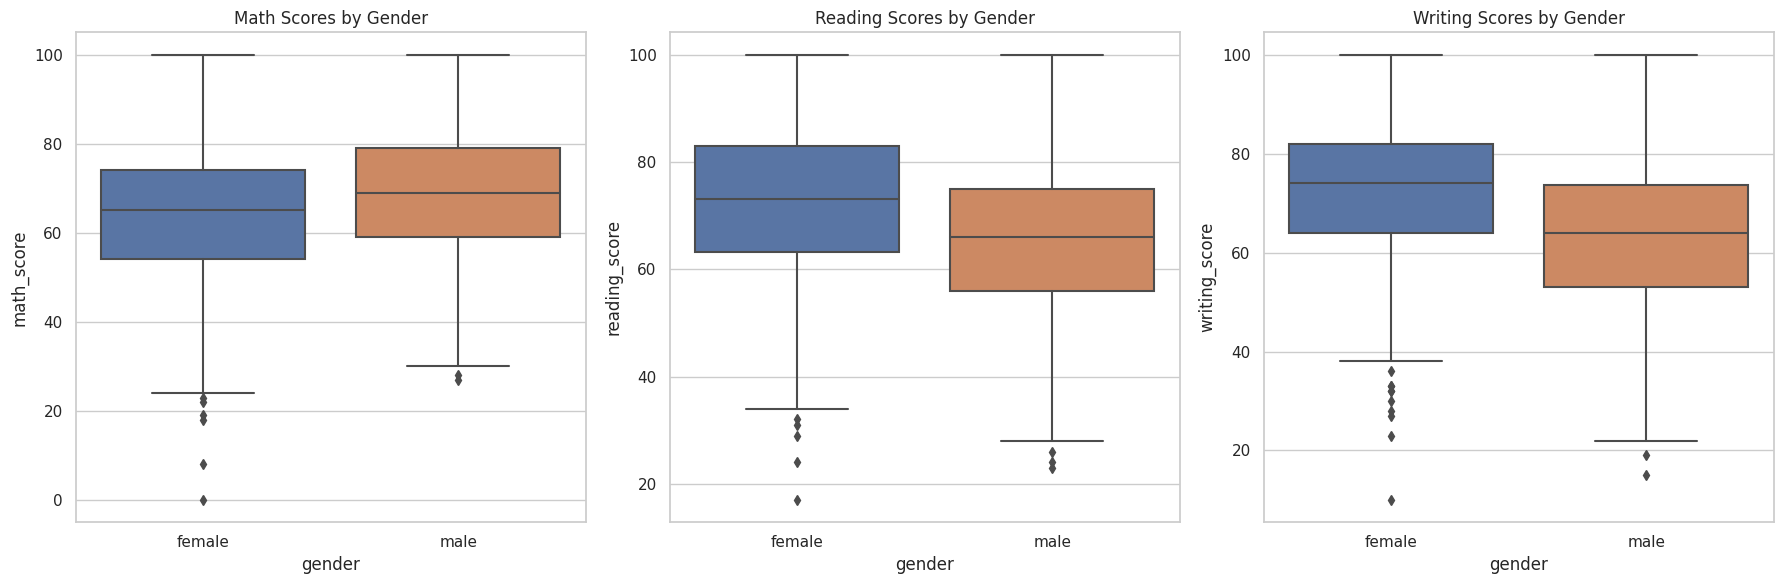

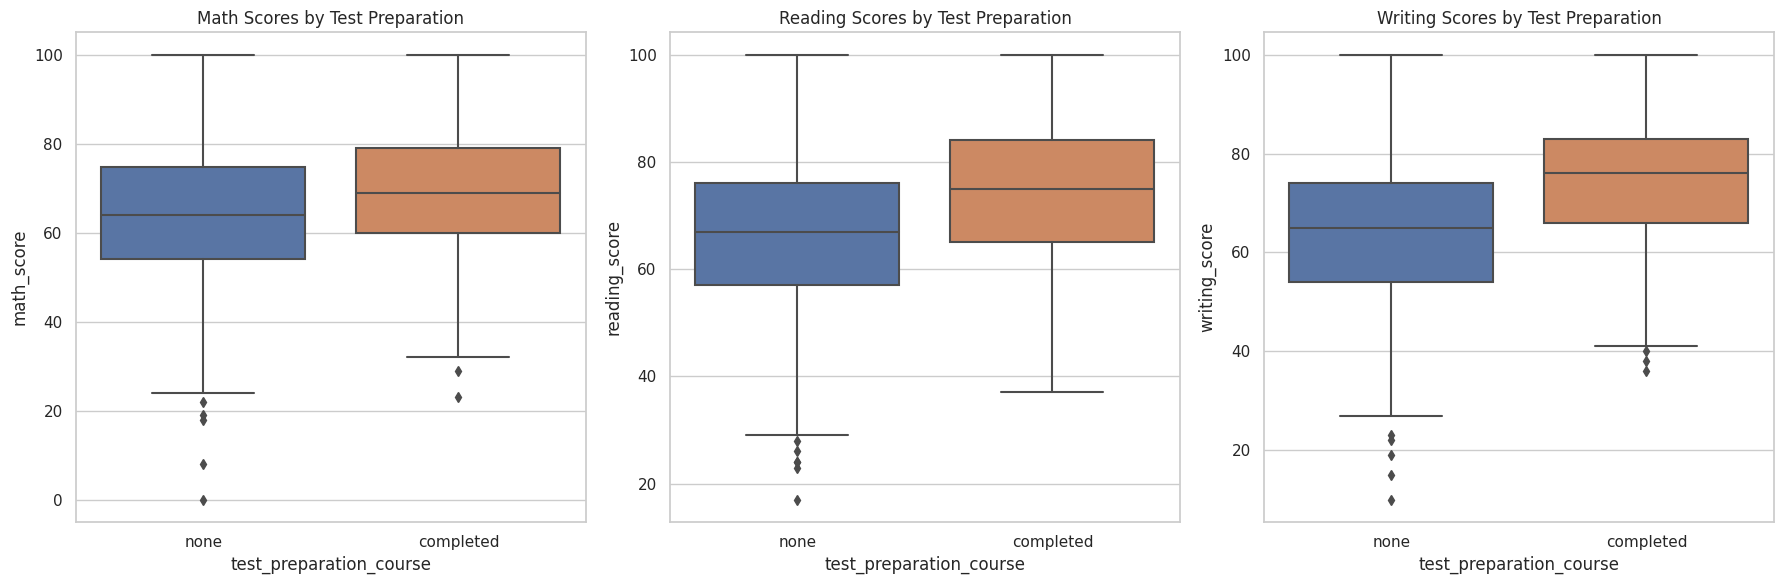

In [9]:
# Create box plots for scores by gender
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Math Scores by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading_score', data=df)
plt.title('Reading Scores by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing_score', data=df)
plt.title('Writing Scores by Gender')

plt.tight_layout()
plt.show()

# Create box plots for scores by test preparation course
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title('Math Scores by Test Preparation')

plt.subplot(1, 3, 2)
sns.boxplot(x='test_preparation_course', y='reading_score', data=df)
plt.title('Reading Scores by Test Preparation')

plt.subplot(1, 3, 3)
sns.boxplot(x='test_preparation_course', y='writing_score', data=df)
plt.title('Writing Scores by Test Preparation')

plt.tight_layout()
plt.show()

## 5. Feature Engineering

Feature engineering is the process of creating new variables from existing data to improve model performance. In this section, we're creating two important new features:

1. **Total Score**: The sum of all three subject scores, providing an overall academic performance metric
2. **Pass/Fail Status**: Our target variable that determines whether a student passed or failed based on meeting minimum thresholds in all subjects

Creating a binary pass/fail variable transforms our problem into a classification task. We've defined "passing" as scoring at least 60 in each subject, which is a common threshold in many educational systems. This definition can be adjusted based on specific educational standards and requirements.

Pass/Fail Distribution:
passed
1    603
0    397
Name: count, dtype: int64
Pass Rate: 60.30%


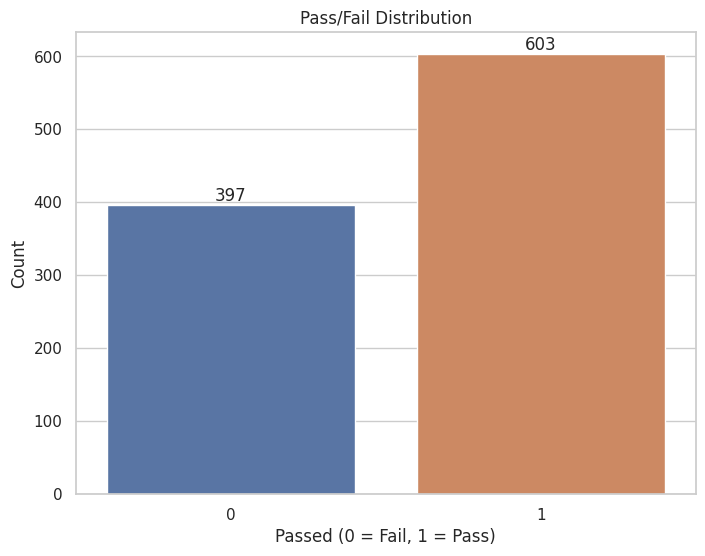

In [10]:
# Create a new feature: total score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Create target variable - pass/fail
# Let's define passing as scoring at least 60 in each subject
passing_threshold = 60
df['passed'] = np.where(
    (df['math_score'] >= passing_threshold) & 
    (df['reading_score'] >= passing_threshold) & 
    (df['writing_score'] >= passing_threshold),
    1, 0
)

# Check the distribution of our target variable
print("Pass/Fail Distribution:")
print(df['passed'].value_counts())
print(f"Pass Rate: {df['passed'].mean() * 100:.2f}%")

# Visualize the pass/fail distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='passed', data=df)
plt.title('Pass/Fail Distribution')
plt.xlabel('Passed (0 = Fail, 1 = Pass)')
plt.ylabel('Count')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')
plt.show()

## 6. Data Preparation for Machine Learning

Before building our machine learning models, we need to prepare the data appropriately. This involves several key steps:

1. **One-hot Encoding**: Converting categorical variables into a format that machine learning algorithms can understand by creating binary columns for each category
2. **Train-Test Split**: Dividing our data into training and testing sets to evaluate model performance on unseen data
3. **Feature Scaling**: Standardizing numerical features to have mean=0 and variance=1, which helps many machine learning algorithms perform better

These preprocessing steps are crucial for building accurate and robust models. Improper data preparation can lead to poorly performing models or misleading results.

In [11]:
# One-hot encode categorical variables
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 
                      'lunch', 'test_preparation_course']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nFirst 5 rows after encoding:")
display(df_encoded.head())

# Define features and target
X = df_encoded.drop(['passed'], axis=1)
y = df_encoded['passed']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['math_score', 'reading_score', 'writing_score', 'total_score']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

Shape after encoding: (1000, 17)

First 5 rows after encoding:


,math_score,reading_score,writing_score,total_score,passed,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,218,1,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,1,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,1,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,0,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,1,True,False,True,False,False,False,False,False,True,False,True,True


Training set: 700 samples
Testing set: 300 samples


## 7. Model Building and Evaluation

Now we'll build and evaluate machine learning models to predict student pass/fail status. We'll implement two different classification algorithms and compare their performance.

### 7.1 Logistic Regression Model

Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome based on one or more predictor variables. It's a good baseline model for classification tasks due to its simplicity and interpretability.

After training the model, we evaluate its performance using several metrics:
- **Accuracy**: The proportion of correct predictions
- **Confusion Matrix**: A table showing correct and incorrect predictions by class
- **Classification Report**: A summary of precision, recall, and F1-score for each class

These metrics help us understand not just how accurate our model is overall, but also how well it performs for each class (pass and fail).

Logistic Regression Results:
Accuracy: 0.9400


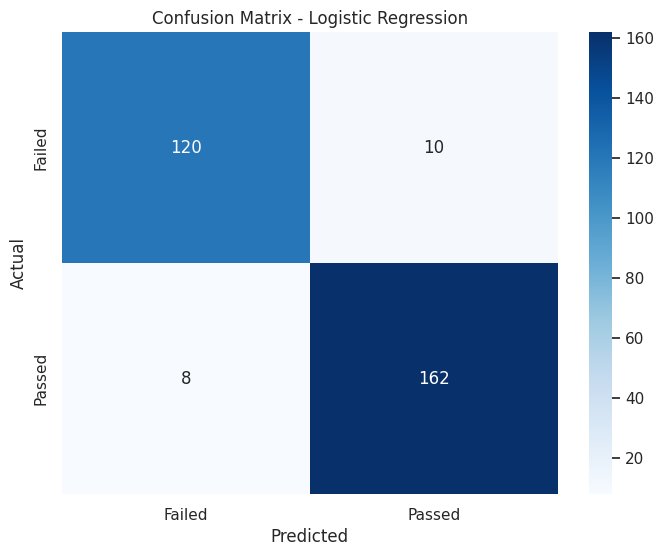


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.94      0.95      0.95       170

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [12]:
# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")

# Create and display confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Failed', 'Passed'],
            yticklabels=['Failed', 'Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Display classification report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

### 7.2 Random Forest Model

Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions. It often performs better than simpler models like Logistic Regression, especially for complex relationships, as it can capture non-linear patterns in the data.

We'll evaluate this model using the same metrics as before, which will allow us to make a direct comparison between the two approaches. Random Forest also provides feature importance measures, which can give us insights into which factors most strongly influence student success.

Random Forest Results:
Accuracy: 0.9967


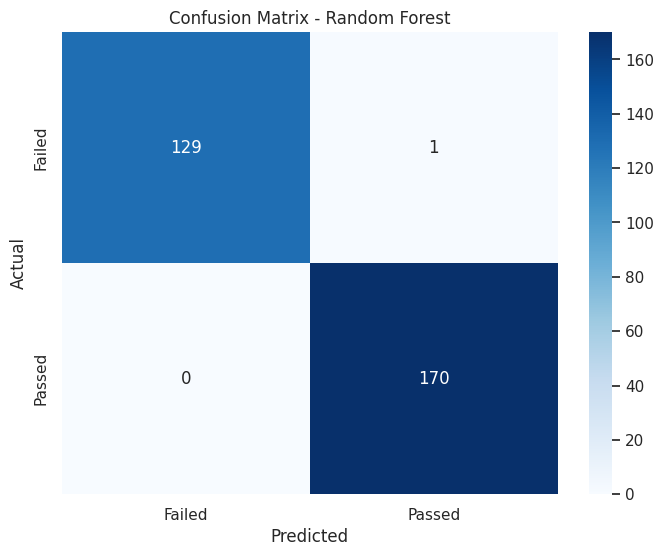


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       130
           1       0.99      1.00      1.00       170

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [13]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Create and display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Failed', 'Passed'],
            yticklabels=['Failed', 'Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Display classification report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

## 8. Model Comparison and Feature Importance

After building multiple models, it's important to compare their performance and understand which features are driving the predictions. This analysis helps us not only choose the best model but also gain insights into the factors that most influence student outcomes.

The bar chart below compares the accuracy of our two models, while the feature importance plot from the Random Forest model reveals which variables have the greatest predictive power. This information can be valuable for educators and policymakers in designing interventions and support programs.

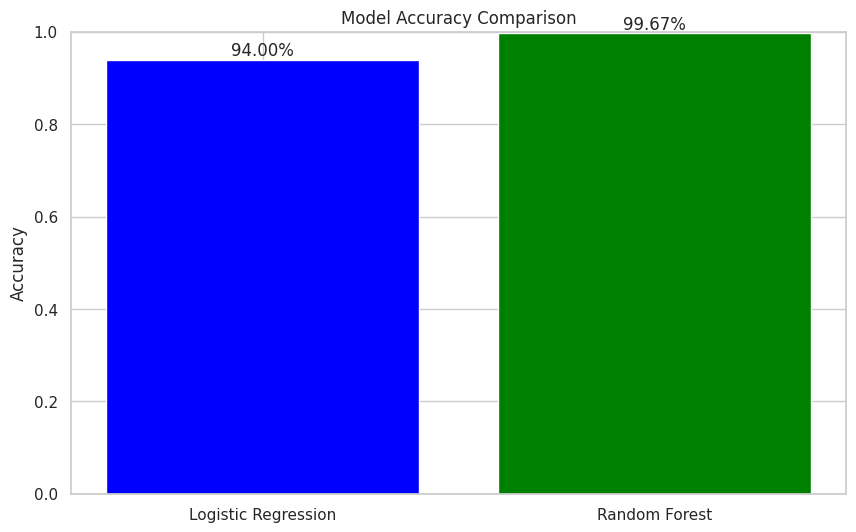

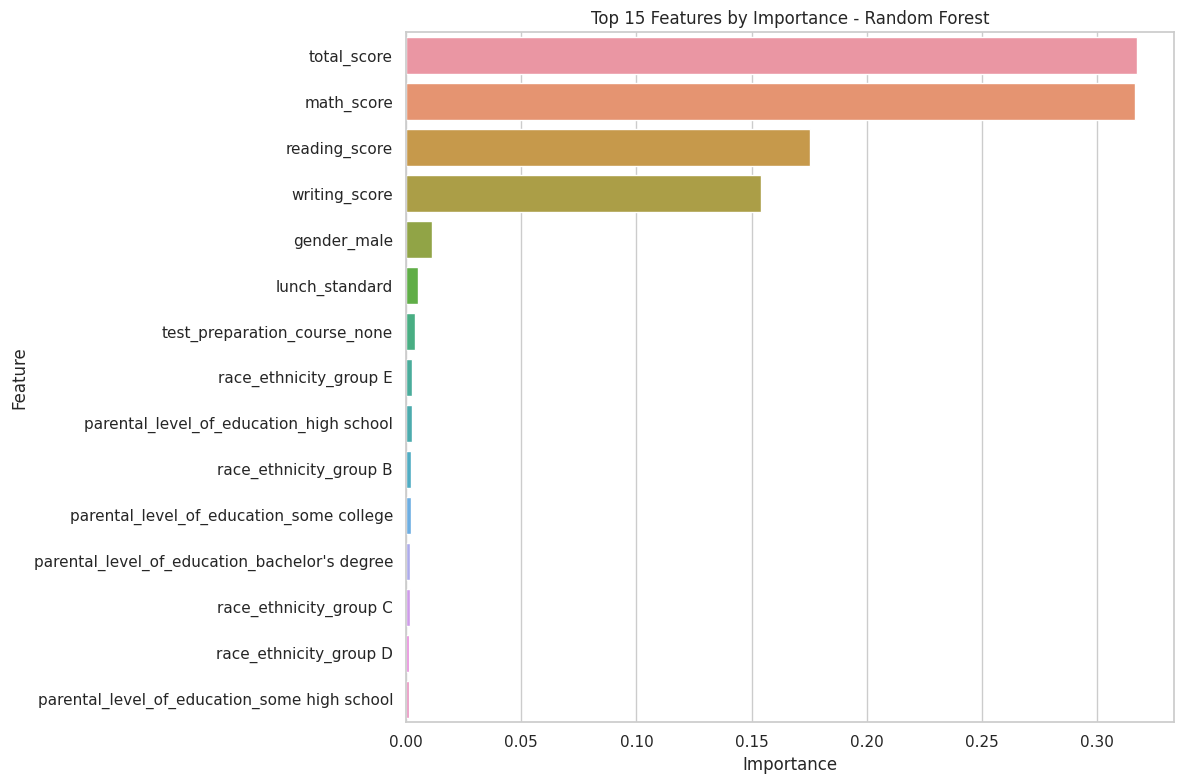

In [14]:
# Compare model accuracies
models = ['Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom')
plt.show()

# Extract feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance - Random Forest')
plt.tight_layout()
plt.show()

## 9. Conclusion and Insights

In this final section, we summarize the key findings from our analysis and the implications for educational practice. These insights can help educators identify at-risk students and develop targeted interventions.

The analysis reveals several important patterns in student performance:
1. The overall pass rate and how it varies across different demographic groups
2. The impact of test preparation on academic success
3. Gender differences in subject-specific performance
4. The predictive power of our machine learning models

These findings can inform educational strategies and highlight areas where additional support might be needed to improve student outcomes.

In [15]:
# Summarize key findings
print("Key Insights:")
print("-" * 40)

# Class distribution
pass_count = df['passed'].sum()
fail_count = len(df) - pass_count
print(f"1. Out of {len(df)} students, {pass_count} ({pass_count/len(df)*100:.1f}%) passed and {fail_count} ({fail_count/len(df)*100:.1f}%) failed.")

# Gender differences
gender_pass_rate = df.groupby('gender')['passed'].mean() * 100
print(f"2. Pass rate: Females {gender_pass_rate.get('female', 0):.1f}%, Males {gender_pass_rate.get('male', 0):.1f}%")

# Test preparation impact
prep_pass_rate = df.groupby('test_preparation_course')['passed'].mean() * 100
print(f"3. Test preparation impact: Completed {prep_pass_rate.get('completed', 0):.1f}% pass rate, None {prep_pass_rate.get('none', 0):.1f}% pass rate")

# Model performance summary
best_model = "Random Forest" if accuracies[1] > accuracies[0] else "Logistic Regression"
print(f"4. Best performing model: {best_model} with {max(accuracies):.2%} accuracy")

Key Insights:
----------------------------------------
1. Out of 1000 students, 603 (60.3%) passed and 397 (39.7%) failed.
2. Pass rate: Females 61.6%, Males 58.9%
3. Test preparation impact: Completed 71.8% pass rate, None 53.9% pass rate
4. Best performing model: Random Forest with 99.67% accuracy
